In [85]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')

In [86]:
df = pd.read_csv('../datasets/updated_uber.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [87]:
df.shape

(200000, 7)

**Fare**
- The cost of each trip in USD


In [88]:
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [89]:
df['fare_amount'].isnull().sum()

0

In [90]:
fare_mean = df['fare_amount'].mean()
fare_std = df['fare_amount'].std()

df_fare = df[(df['fare_amount'] >= (fare_mean - fare_std)) & (df['fare_amount'] <= (fare_mean + fare_std))]
df_fare

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [91]:
df_fare['fare_amount'].describe()

count    181342.000000
mean          8.836870
std           3.994925
min           2.500000
25%           5.700000
50%           8.000000
75%          11.000000
max          21.070000
Name: fare_amount, dtype: float64

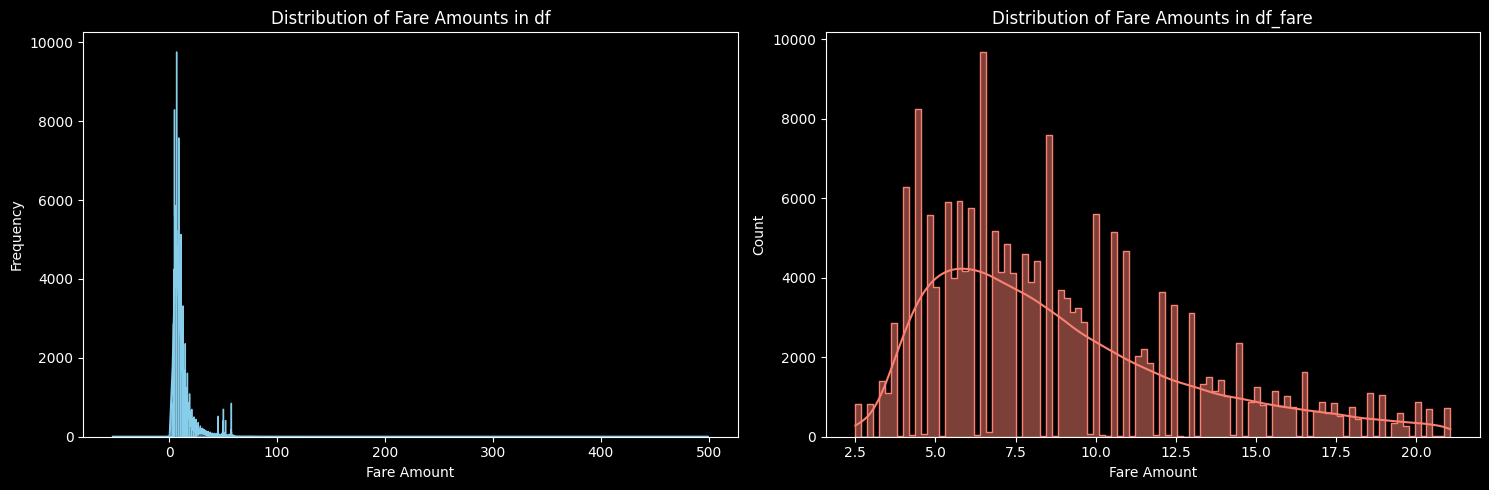

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='fare_amount', element='step', ax=axes[0], color='skyblue',kde=True,line_kws={'color': 'darkblue'})
axes[0].set_title('Distribution of Fare Amounts in df')
axes[0].set_xlabel('Fare Amount')
axes[0].set_ylabel('Frequency')

# Plot the second histogram
sns.histplot(data=df_fare, x='fare_amount', element='step', ax=axes[1], color='salmon',kde=True,line_kws={'color': 'white'})
axes[1].set_title('Distribution of Fare Amounts in df_fare')
axes[1].set_xlabel('Fare Amount')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

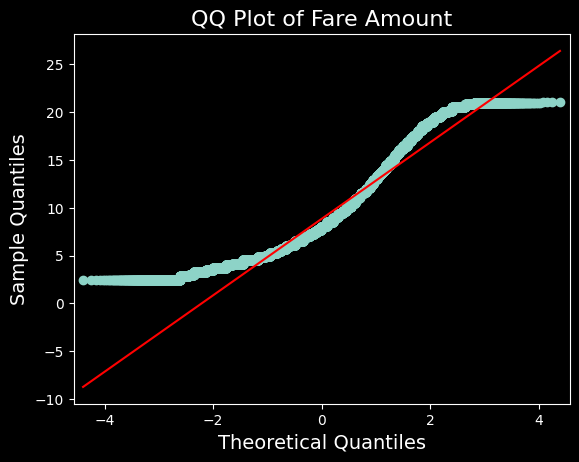

In [93]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
qq_plot = sm.qqplot(df_fare['fare_amount'], line='s')

plt.title('QQ Plot of Fare Amount', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)

plt.show()

In [94]:
import scipy.stats as stats
shapiro_test = stats.shapiro(df_fare['fare_amount'])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.8f}")



Shapiro-Wilk test statistic: 0.9261, p-value: 0.00000000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 181342.
  res = hypotest_fun_out(*samples, **kwds)


**Conclusions For Fare Amount**
- The HistPlot and KDE plot depict a right-skewed distribution of fare amounts, with a concentration of lower values and a tail extending towards higher amounts, confirmed by the QQ Plot.
- The Shapiro-Wilk test assesses that the data set does not follow normal distribution completely.

**Passenger Count**
-  The number of passengers in the vehicle

In [95]:
df['passenger_count'].describe()

count    200000.000000
mean          1.684535
std           1.385997
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [96]:
df['passenger_count'].isnull().sum()

0

In [97]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [98]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64

In [99]:
df_passenger = df[(df['passenger_count'] != 0) & (df['passenger_count'] != 208)]
df_passenger

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [100]:
df_passenger['passenger_count'].value_counts()

passenger_count
1    138425
2     29428
5     14009
3      8881
4      4276
6      4271
Name: count, dtype: int64

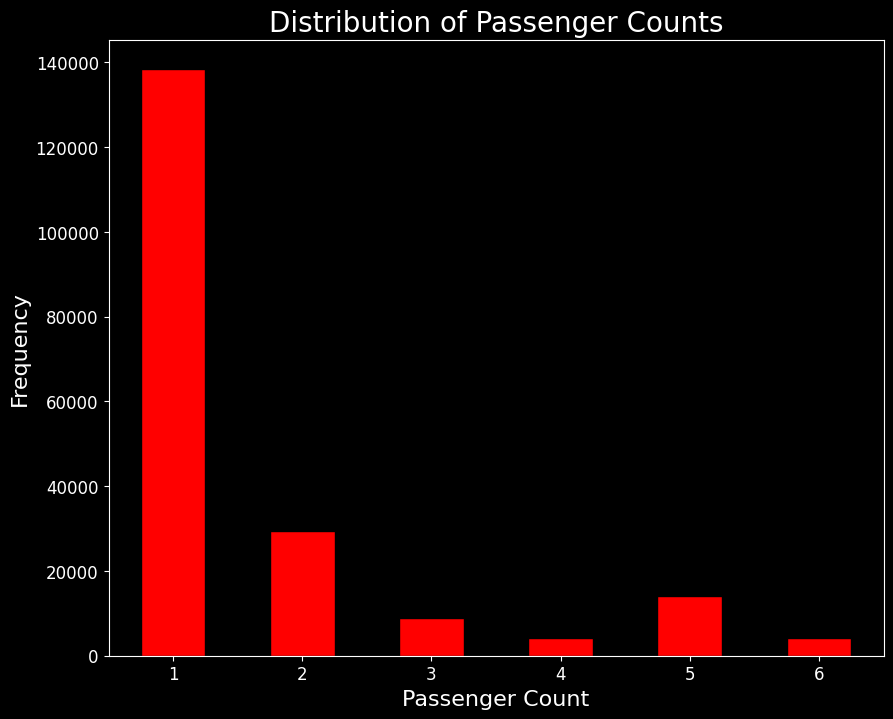

In [101]:
value_counts = df_passenger['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
value_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Passenger Counts', fontsize=20)
plt.xlabel('Passenger Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

**Conclusion For Passenger Count**
- Most rides have just one passenger, dominating the distribution.
- All other rides with fewer passengers.

**Latitudes and Longitudes - Distance**

**World Map Plots**

In [102]:
from PIL import Image
img = Image.open("../images/pickups.png")
img.show()

In [103]:
from PIL import Image
img = Image.open("../images/dropoffs.png")
img.show()

In [104]:
# import plotly.express as px
# fig = px.scatter_geo(df,lat='pickup_latitude',lon='pickup_longitude')
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()

In [105]:
# import plotly.express as px
# fig = px.scatter_geo(df,lat='dropoff_latitude',lon='dropoff_longitude')
# fig.update_layout(title = 'World map', title_x=0.5)
# fig.show()

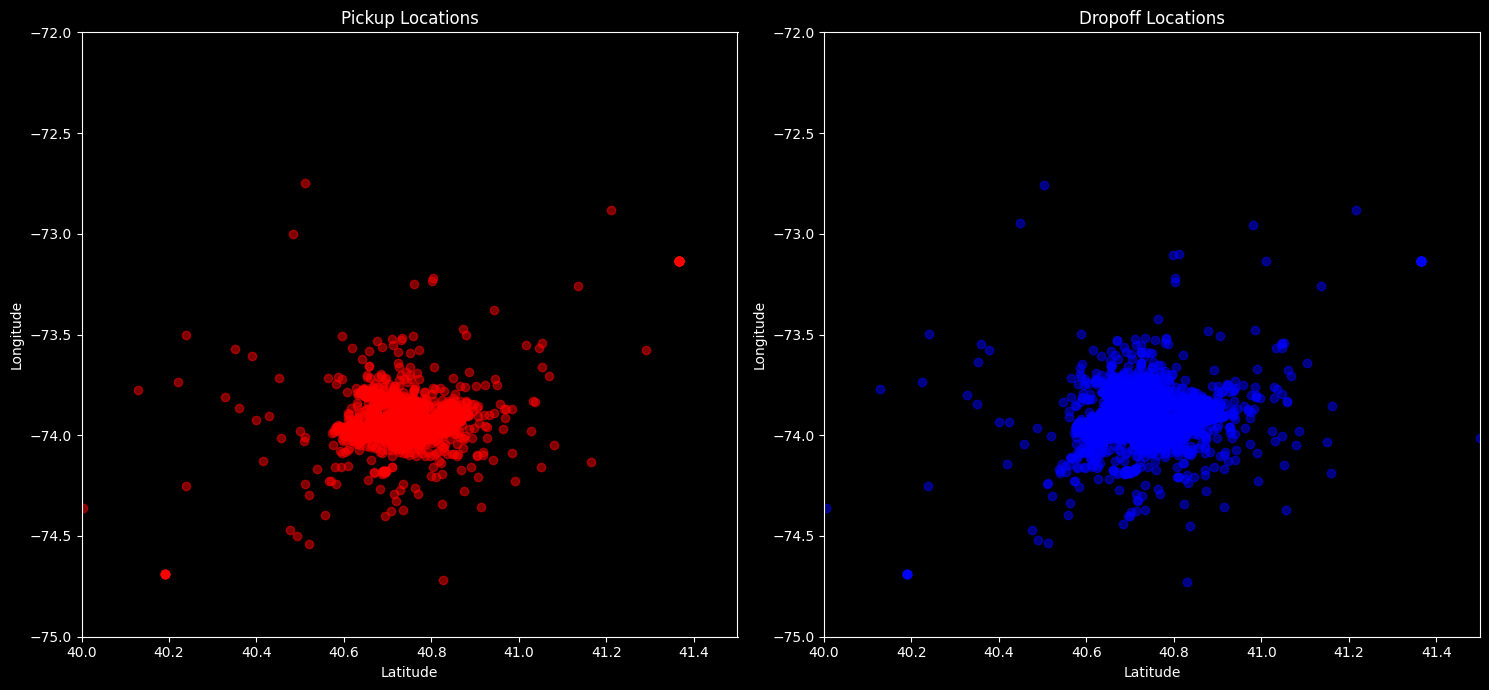

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df['pickup_latitude'], y = df['pickup_longitude'], c='red', alpha=0.5)
axs[0].set_xlim(40, 41.5)
axs[0].set_ylim(-75, -72)
axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')

# Second subplot for dropoff locations
axs[1].scatter(x = df['dropoff_latitude'], y = df['dropoff_longitude'], c='blue', alpha=0.5)
axs[1].set_xlim(40, 41.5)
axs[1].set_ylim(-75, -72)
axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()

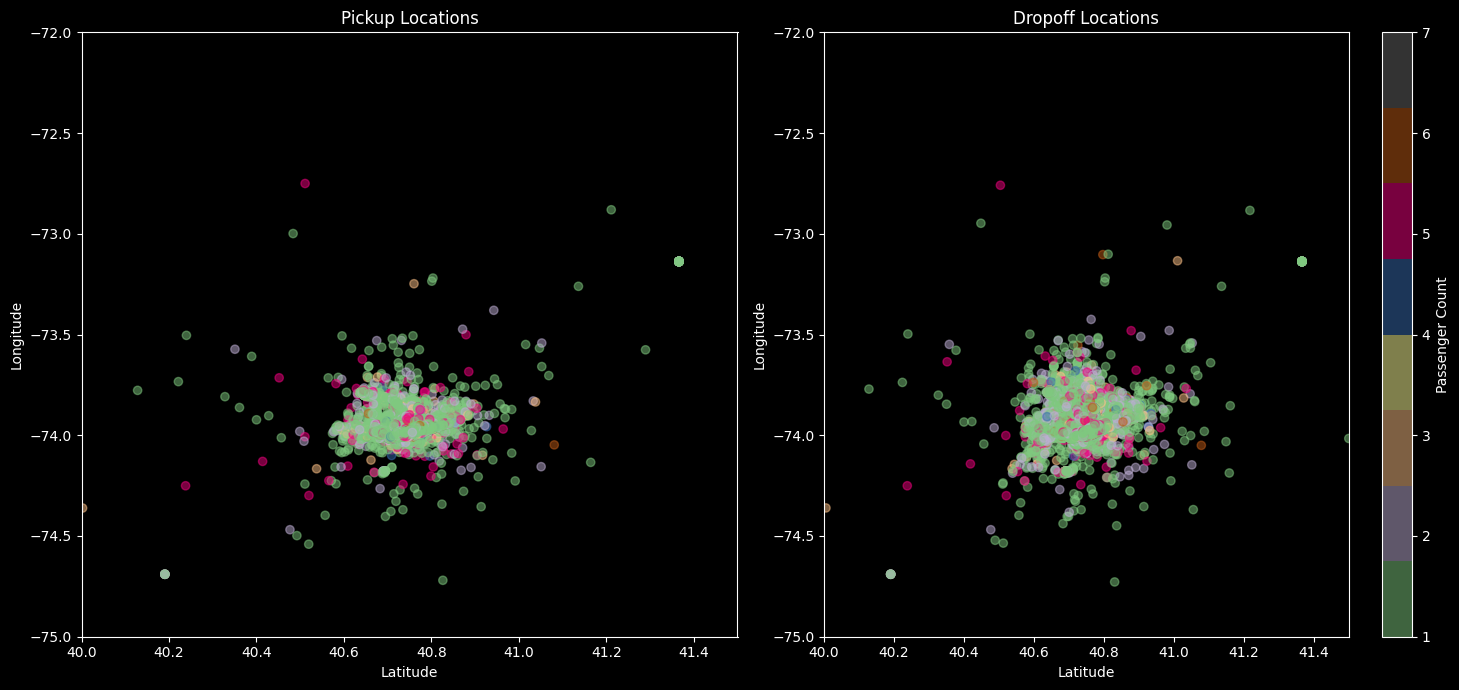

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df['pickup_latitude'], y = df['pickup_longitude'], c=df['passenger_count'], cmap='Accent', alpha=0.5,vmin=1, vmax=7)
axs[0].set_xlim(40, 41.5)
axs[0].set_ylim(-75, -72)
axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')

# Second subplot for dropoff locations
sc = axs[1].scatter(x = df['dropoff_latitude'], y = df['dropoff_longitude'], c=df['passenger_count'], cmap='Accent', alpha=0.5,vmin=1, vmax=7)
axs[1].set_xlim(40, 41.5)
axs[1].set_ylim(-75, -72)
axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')

cbar = plt.colorbar(sc, ax=axs[1])
cbar.set_label('Passenger Count')
plt.tight_layout()
plt.show()

**Based on our observations of the world map plot, the points are predominantly located within the latitude range of 40.0 to 41.4 and the longitude range of -75 to -72.5.**


**The coordinates of New York are (40.730610, -73.935242), which confirms the accuracy of our dataset.**

**We would reduce our dataset to :**
- Latitude Range : 40.75258181709071 to 40.752812309438696
- Longitude Range : -73.98193908743959 to -73.98095037980285

In [108]:
df_lat_long = df[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]
df_lat_long

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.738354,-73.999817,40.723217,-73.999512
1,40.728225,-73.994355,40.750325,-73.994710
2,40.740770,-74.005043,40.772647,-73.962565
3,40.790844,-73.976124,40.803349,-73.965316
4,40.744085,-73.925023,40.761247,-73.973082
...,...,...,...,...
199995,40.739367,-73.987042,40.740297,-73.986525
199996,40.736837,-73.984722,40.739620,-74.006672
199997,40.756487,-73.986017,40.692588,-73.858957
199998,40.725452,-73.997124,40.695415,-73.983215


In [109]:
df_lat_long.isnull().sum()

pickup_latitude      0
pickup_longitude     0
dropoff_latitude     1
dropoff_longitude    1
dtype: int64

In [110]:
df_lat_long = df_lat_long.dropna()

In [111]:
df_lat_long

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.738354,-73.999817,40.723217,-73.999512
1,40.728225,-73.994355,40.750325,-73.994710
2,40.740770,-74.005043,40.772647,-73.962565
3,40.790844,-73.976124,40.803349,-73.965316
4,40.744085,-73.925023,40.761247,-73.973082
...,...,...,...,...
199995,40.739367,-73.987042,40.740297,-73.986525
199996,40.736837,-73.984722,40.739620,-74.006672
199997,40.756487,-73.986017,40.692588,-73.858957
199998,40.725452,-73.997124,40.695415,-73.983215


In [112]:
df_lat_long.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,199999.000000,199999.000000,199999.000000,199999.000000
mean,39.935881,-72.527631,39.923890,-72.525292
std,7.720558,11.437815,6.794829,13.117408
min,-74.015515,-1340.648410,-881.985513,-3356.666300
25%,40.734796,-73.992065,40.733823,-73.991407
50%,40.752592,-73.981823,40.753042,-73.980093
75%,40.767158,-73.967154,40.768001,-73.963658
max,1644.421482,57.418457,872.697628,1153.572603


In [113]:
df_lat_long = df_lat_long[(df_lat_long['pickup_latitude'] >= 40.3) & (df_lat_long['pickup_latitude'] <= 41.2) & (df_lat_long['pickup_longitude'] >= -75) & (df_lat_long['pickup_longitude'] <= -73) & (df_lat_long['dropoff_latitude'] >= 40.3) & (df_lat_long['dropoff_latitude'] <= 41.2) & (df_lat_long['dropoff_longitude'] >= -75) & (df_lat_long['dropoff_longitude'] <= -73)]
df_lat_long.shape

(195708, 4)

In [114]:
df_lat_long.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,195708.000000,195708.000000,195708.000000,195708.000000
mean,40.750784,-73.975424,40.751102,-73.974455
std,0.027310,0.035356,0.031212,0.035500
min,40.327952,-74.719883,40.326662,-74.728123
25%,40.736452,-73.992276,40.735327,-73.991600
50%,40.753300,-73.982113,40.753738,-73.980545
75%,40.767527,-73.968382,40.768322,-73.965412
max,41.164293,-73.219710,41.161225,-73.101445


In [115]:
df_copy = df_lat_long.copy()

for i in df_copy.columns:
    Q1 = df_copy[i].quantile(0.25)
    Q3 = df_copy[i].quantile(0.75)
    IQR = Q3 - Q1
    df_copy = df_copy[df_copy[i] <= (Q3+(1.5*IQR))]
    df_copy = df_copy[df_copy[i] >= (Q1-(1.5*IQR))]

df_lat_long = df_copy

print("Latitude Range :",df_copy['pickup_latitude'].mean(),"to",df_copy['dropoff_latitude'].mean())
print("Longitude Range :",df_copy['pickup_longitude'].mean(),"to",df_copy['dropoff_longitude'].mean())
    

Latitude Range : 40.75258181709071 to 40.752812309438696
Longitude Range : -73.98193908743959 to -73.98095037980285


In [116]:
df_lat_long.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,170764.000000,170764.000000,170764.000000,170764.000000
mean,40.752582,-73.981939,40.752812,-73.980950
std,0.021484,0.016106,0.022881,0.016893
min,40.689847,-74.026353,40.688311,-74.027438
25%,40.737830,-73.992920,40.737659,-73.992299
50%,40.753405,-73.982917,40.754007,-73.982019
75%,40.766691,-73.971457,40.767487,-73.970278
max,40.814132,-73.935377,40.816385,-73.932950


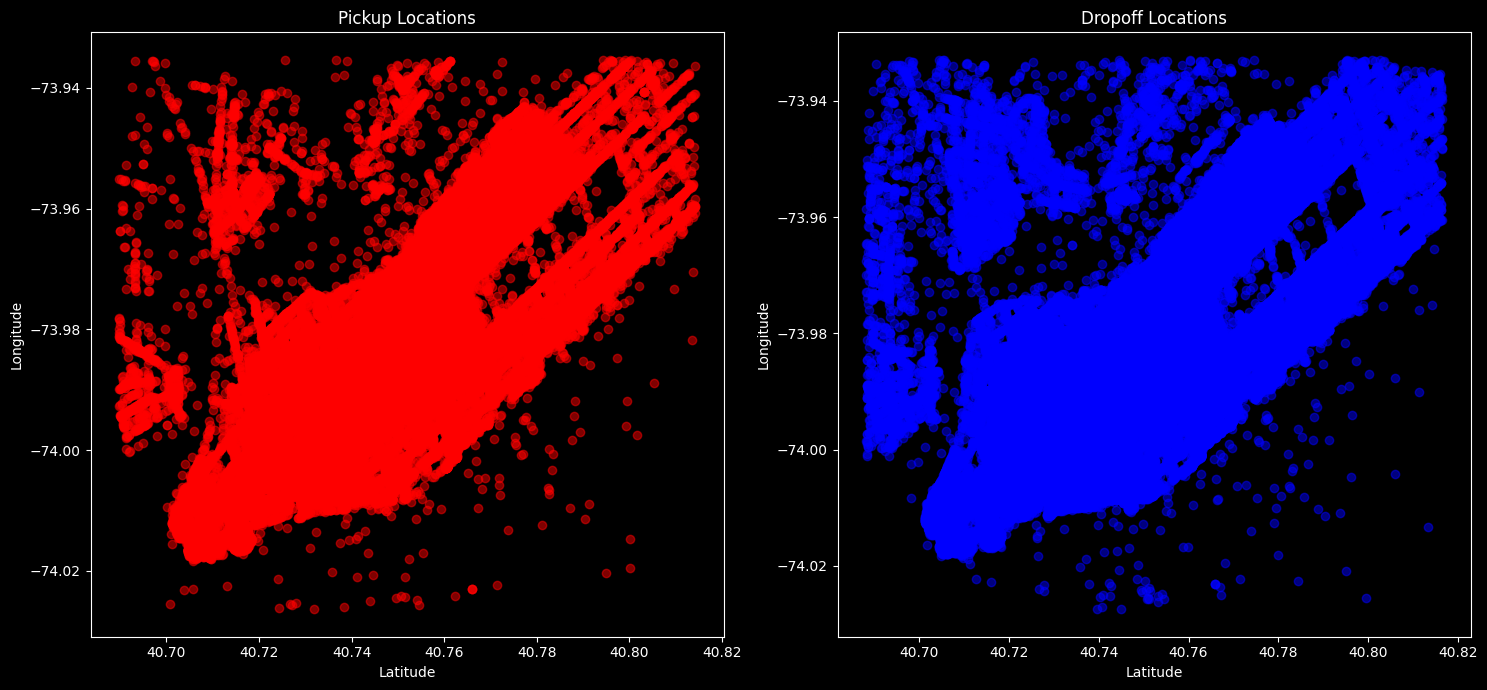

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df_lat_long['pickup_latitude'], y = df_lat_long['pickup_longitude'], c='red', alpha=0.5)

axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')

# Second subplot for dropoff locations
axs[1].scatter(x = df_lat_long['dropoff_latitude'], y = df_lat_long['dropoff_longitude'], c='blue', alpha=0.5)

axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()

**The outliers have been removed, and the data is now focused on New York.**

In [118]:
df_lat_long

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.738354,-73.999817,40.723217,-73.999512
1,40.728225,-73.994355,40.750325,-73.994710
2,40.740770,-74.005043,40.772647,-73.962565
3,40.790844,-73.976124,40.803349,-73.965316
5,40.755910,-73.969019,40.755910,-73.969019
...,...,...,...,...
199994,40.760770,-73.983070,40.754177,-73.972972
199995,40.739367,-73.987042,40.740297,-73.986525
199996,40.736837,-73.984722,40.739620,-74.006672
199998,40.725452,-73.997124,40.695415,-73.983215


**Finding the distance between pickup and dropoff location.**

In [119]:
from math import sin, cos, sqrt, atan2, radians

# Radius of the Earth in kilometers
earth_radius_km = 6373.0

# Coordinates of the first location (in radians)
latitude1 = radians(40.790844)
longitude1 = radians(-73.976124)

# Coordinates of the second location (in radians)
latitude2 = radians(40.803349)
longitude2 = radians(-73.965316)

# Differences in coordinates
delta_longitude = longitude2 - longitude1
delta_latitude = latitude2 - latitude1

# Haversine formula to calculate the distance
a = sin(delta_latitude / 2)**2 + cos(latitude1) * cos(latitude2) * sin(delta_longitude / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

# Calculate the distance
distance_km = earth_radius_km * c

# Print the distance
print(f"The distance between the two points is {distance_km:.2f} kilometers.")


The distance between the two points is 1.66 kilometers.


In [120]:
from math import sin, cos, sqrt, atan2, radians
# Radius of the Earth in kilometers
earth_radius_km = 6373.0

def calc_distance(df):
    dist = []
    for index, row in df.iterrows():
        latitude1 = radians(row['pickup_latitude'])
        longitude1 = radians(row['pickup_longitude'])
        
        latitude2 = radians(row['dropoff_latitude'])
        longitude2 = radians(row['dropoff_longitude'])
        
        delta_longitude = longitude2 - longitude1
        delta_latitude = latitude2 - latitude1
        
        # Haversine formula to calculate the distance
        a = sin(delta_latitude / 2)**2 + cos(latitude1) * cos(latitude2) * sin(delta_longitude / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
                
        distance_km = earth_radius_km * c
        dist.append(distance_km)
    return np.array(dist)        
        
        

In [121]:
calc_distance(df_lat_long)

array([1.68385119, 2.45836138, 5.03795822, ..., 1.87563879, 3.54082665,
       5.41948424])

In [122]:
df_c = df_lat_long.copy()
df_c['Distance'] = calc_distance(df_lat_long)
df_lat_long = df_c

In [123]:
df_lat_long

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,Distance
0,40.738354,-73.999817,40.723217,-73.999512,1.683851
1,40.728225,-73.994355,40.750325,-73.994710,2.458361
2,40.740770,-74.005043,40.772647,-73.962565,5.037958
3,40.790844,-73.976124,40.803349,-73.965316,1.662205
5,40.755910,-73.969019,40.755910,-73.969019,0.000000
...,...,...,...,...,...
199994,40.760770,-73.983070,40.754177,-73.972972,1.123230
199995,40.739367,-73.987042,40.740297,-73.986525,0.112245
199996,40.736837,-73.984722,40.739620,-74.006672,1.875639
199998,40.725452,-73.997124,40.695415,-73.983215,3.540827


In [124]:
df_lat_long['Distance'].describe()

count    170764.000000
mean          2.419203
std           1.716926
min           0.000000
25%           1.187994
50%           1.950366
75%           3.176561
max          14.318823
Name: Distance, dtype: float64

In [132]:
# df_lat_long = df_lat_long['Distance'] != 0
df_lat_long = df_lat_long[df_lat_long['Distance'] != 0]

In [134]:
df_lat_long['Distance'].describe()

count    169246.000000
mean          2.440901
std           1.709184
min           0.000084
25%           1.206403
50%           1.965423
75%           3.192348
max          14.318823
Name: Distance, dtype: float64

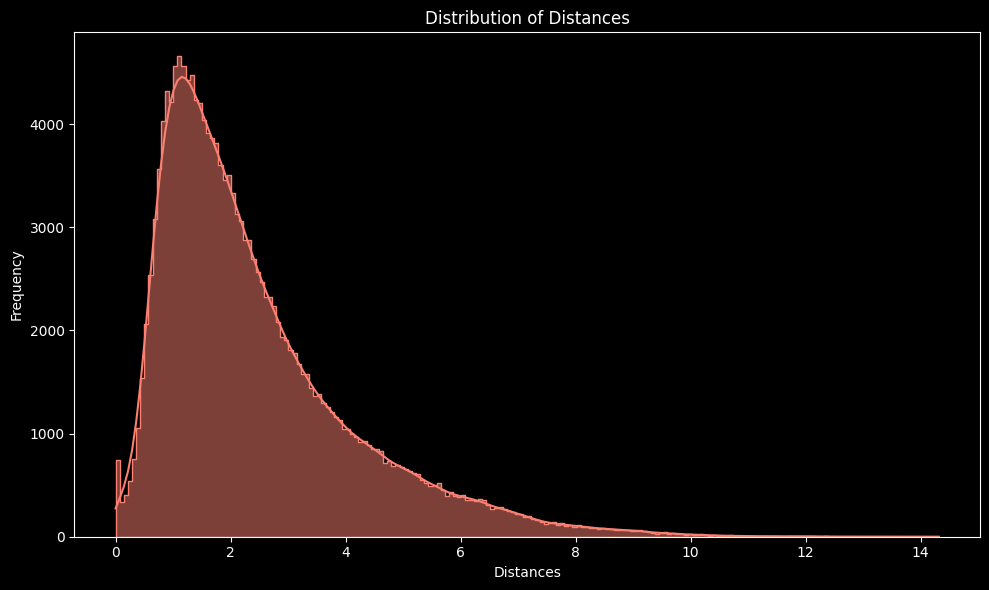

In [133]:
# Plot the distance histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_lat_long, x='Distance', element='step', color='salmon',kde=True)
plt.title('Distribution of Distances')
plt.xlabel('Distances')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**The distance traveled in a ride typically ranges upto 4km, with an average distance of 2.44 km.**

**Time Analysis**

In [135]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [228]:
df_time = df.copy()

In [229]:
df_time

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [230]:
df_time = df_time[['fare_amount','pickup_datetime','passenger_count']]

In [231]:
df_time

,fare_amount,pickup_datetime,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,1
1,7.7,2009-07-17 20:04:56 UTC,1
2,12.9,2009-08-24 21:45:00 UTC,1
3,5.3,2009-06-26 08:22:21 UTC,3
4,16.0,2014-08-28 17:47:00 UTC,5
...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,1
199996,7.5,2014-03-14 01:09:00 UTC,1
199997,30.9,2009-06-29 00:42:00 UTC,2
199998,14.5,2015-05-20 14:56:25 UTC,1


In [232]:
df_time['pickup_datetime']=pd.to_datetime(df_time['pickup_datetime'])

In [233]:
df_time['year'] = df_time['pickup_datetime'].dt.year
df_time['month'] = df_time['pickup_datetime'].dt.month
df_time['day'] = df_time['pickup_datetime'].dt.day
df_time['hour'] = df_time['pickup_datetime'].dt.hour
df_time['minute'] = df_time['pickup_datetime'].dt.minute
df_time['second'] = df_time['pickup_datetime'].dt.second
df_time['weekday'] = df_time['pickup_datetime'].dt.weekday

In [234]:
df_time

,fare_amount,pickup_datetime,passenger_count,year,month,day,hour,minute,second,weekday
0,7.5,2015-05-07 19:52:06+00:00,1,2015,5,7,19,52,6,3
1,7.7,2009-07-17 20:04:56+00:00,1,2009,7,17,20,4,56,4
2,12.9,2009-08-24 21:45:00+00:00,1,2009,8,24,21,45,0,0
3,5.3,2009-06-26 08:22:21+00:00,3,2009,6,26,8,22,21,4
4,16.0,2014-08-28 17:47:00+00:00,5,2014,8,28,17,47,0,3
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,1,2012,10,28,10,49,0,6
199996,7.5,2014-03-14 01:09:00+00:00,1,2014,3,14,1,9,0,4
199997,30.9,2009-06-29 00:42:00+00:00,2,2009,6,29,0,42,0,0
199998,14.5,2015-05-20 14:56:25+00:00,1,2015,5,20,14,56,25,2


In [235]:
df_time['pickup_datetime'].max()

Timestamp('2015-06-30 23:40:39+0000', tz='UTC')

In [236]:
df_time['pickup_datetime'].min()

Timestamp('2009-01-01 01:15:22+0000', tz='UTC')

In [237]:
df_time['pickup_datetime'].mean()

Timestamp('2012-03-22 15:02:18.433115136+0000', tz='UTC')

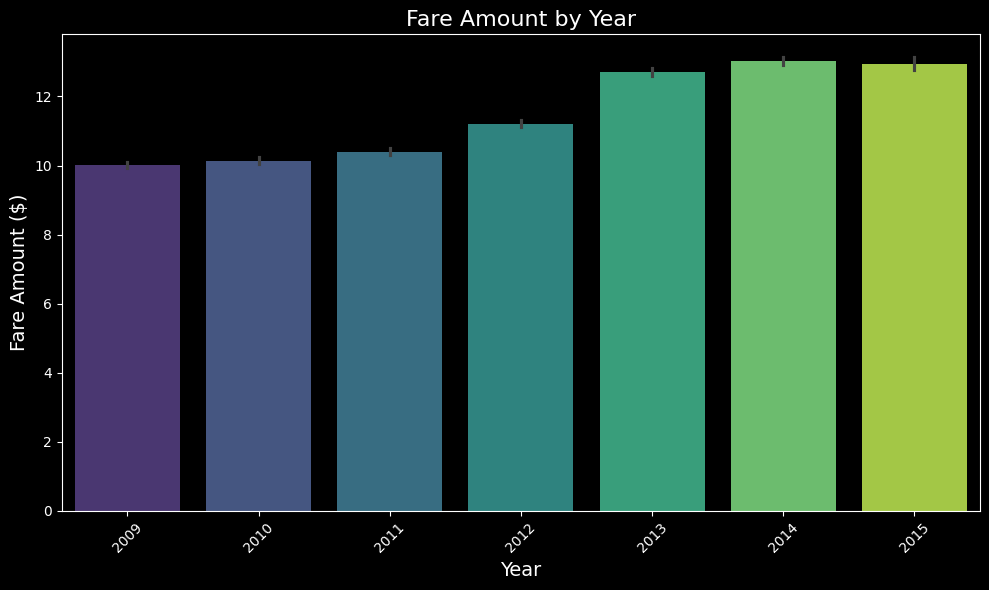

In [238]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='year', y='fare_amount', data=df_time, palette="viridis")
bar_plot.set_title("Fare Amount by Year", fontsize=16)
bar_plot.set_xlabel("Year", fontsize=14)
bar_plot.set_ylabel("Fare Amount ($)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [239]:
import warnings
warnings.filterwarnings("ignore")

**Demand Pattern Analysis**

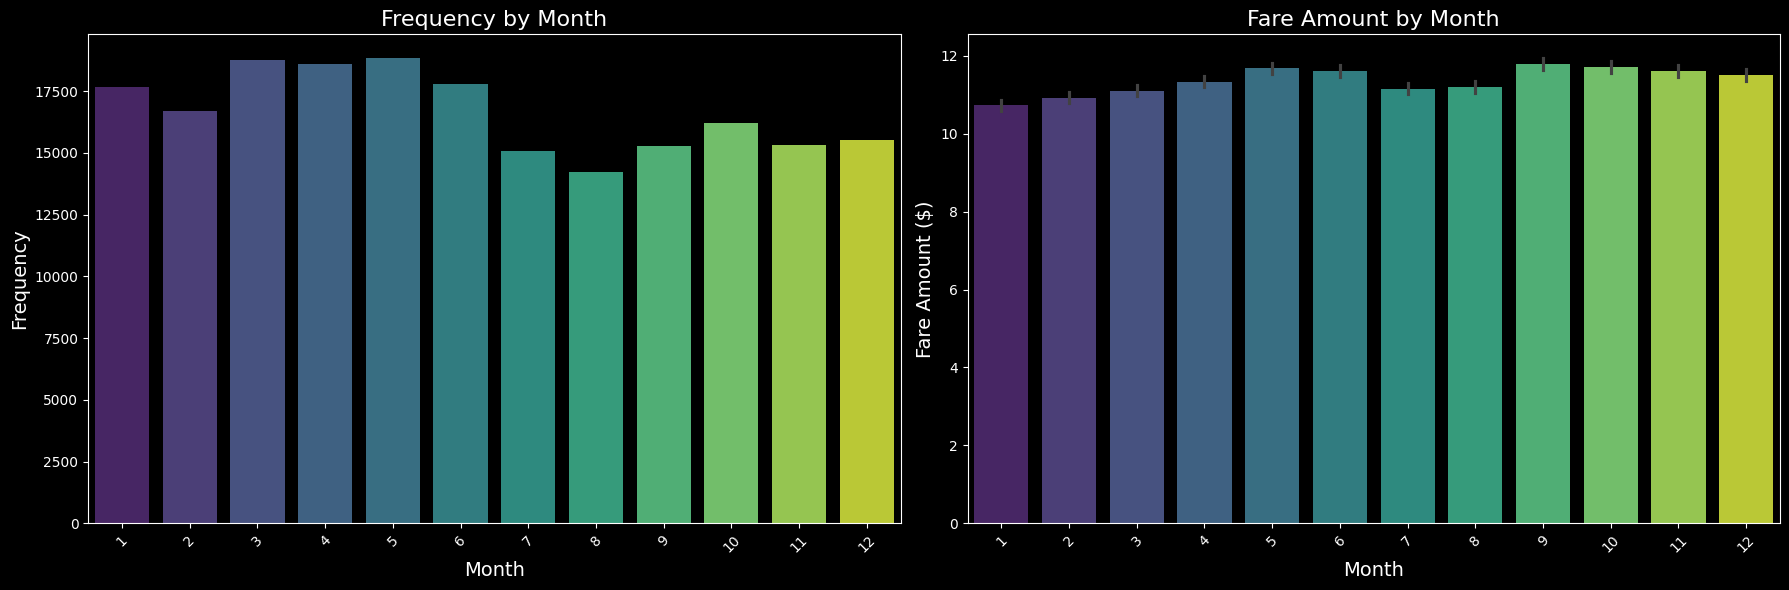

In [240]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(ax=axes[0], x='month', data=df_time, palette="viridis")
axes[0].set_title("Frequency by Month", fontsize=16)
axes[0].set_xlabel("Month", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

sns.barplot(ax=axes[1], x='month', y = 'fare_amount',data=df_time, palette="viridis")
axes[1].set_title("Fare Amount by Month", fontsize=16)
axes[1].set_xlabel("Month", fontsize=14)
axes[1].set_ylabel("Fare Amount ($)", fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

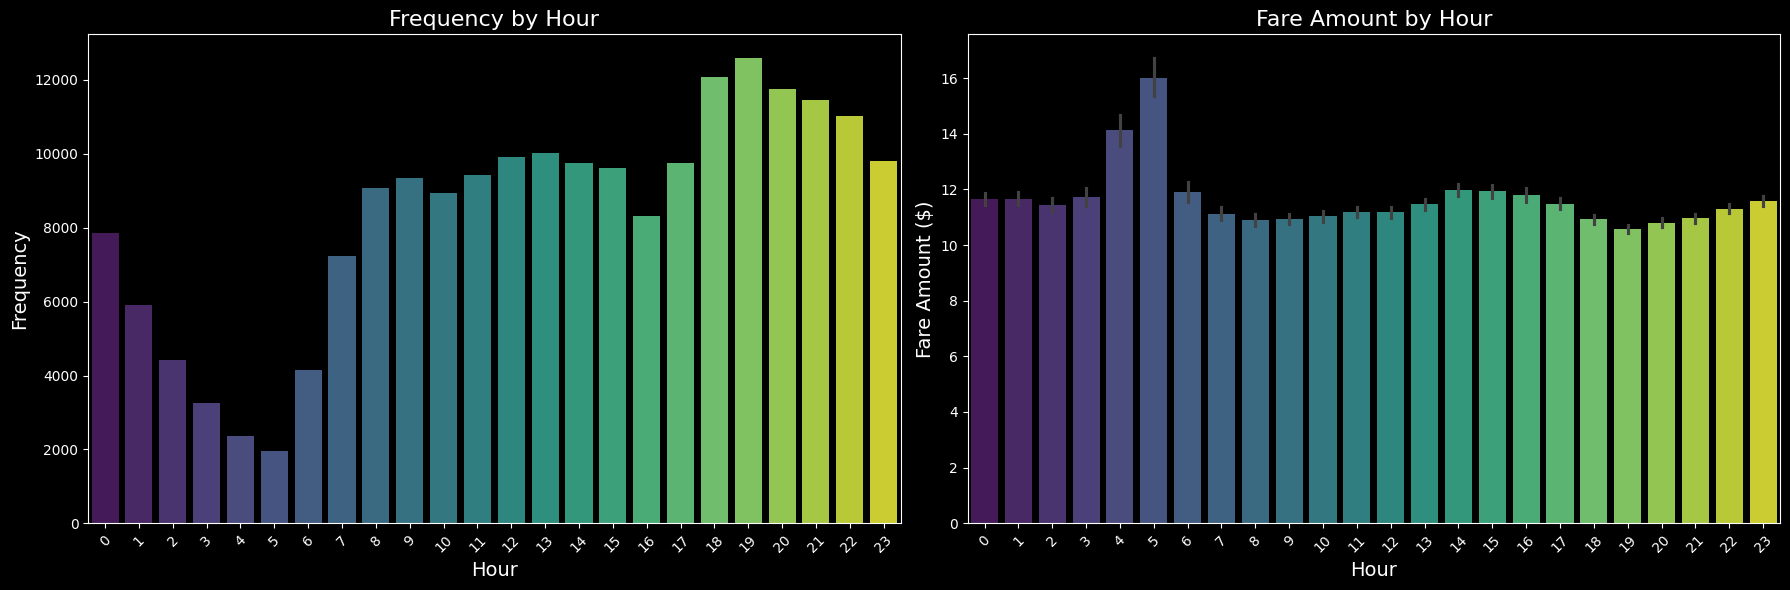

In [241]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(ax=axes[0], x='hour', data=df_time, palette="viridis")
axes[0].set_title("Frequency by Hour", fontsize=16)
axes[0].set_xlabel("Hour", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

sns.barplot(ax=axes[1], x='hour', y = 'fare_amount',data=df_time, palette="viridis")
axes[1].set_title("Fare Amount by Hour", fontsize=16)
axes[1].set_xlabel("Hour", fontsize=14)
axes[1].set_ylabel("Fare Amount ($)", fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [242]:
mappings = {
    1: 'Q1',
    2: 'Q1',
    3: 'Q1',
    4: 'Q2',
    5: 'Q2',
    6: 'Q2',
    7: 'Q3',
    8: 'Q3',
    9: 'Q3',
    10: 'Q4',
    11: 'Q4',
    12: 'Q4'
}

In [243]:
df_time['quarter'] = df_time['month'].map(mappings)

In [244]:
df_time

,fare_amount,pickup_datetime,passenger_count,year,month,day,hour,minute,second,weekday,quarter
0,7.5,2015-05-07 19:52:06+00:00,1,2015,5,7,19,52,6,3,Q2
1,7.7,2009-07-17 20:04:56+00:00,1,2009,7,17,20,4,56,4,Q3
2,12.9,2009-08-24 21:45:00+00:00,1,2009,8,24,21,45,0,0,Q3
3,5.3,2009-06-26 08:22:21+00:00,3,2009,6,26,8,22,21,4,Q2
4,16.0,2014-08-28 17:47:00+00:00,5,2014,8,28,17,47,0,3,Q3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,1,2012,10,28,10,49,0,6,Q4
199996,7.5,2014-03-14 01:09:00+00:00,1,2014,3,14,1,9,0,4,Q1
199997,30.9,2009-06-29 00:42:00+00:00,2,2009,6,29,0,42,0,0,Q2
199998,14.5,2015-05-20 14:56:25+00:00,1,2015,5,20,14,56,25,2,Q2


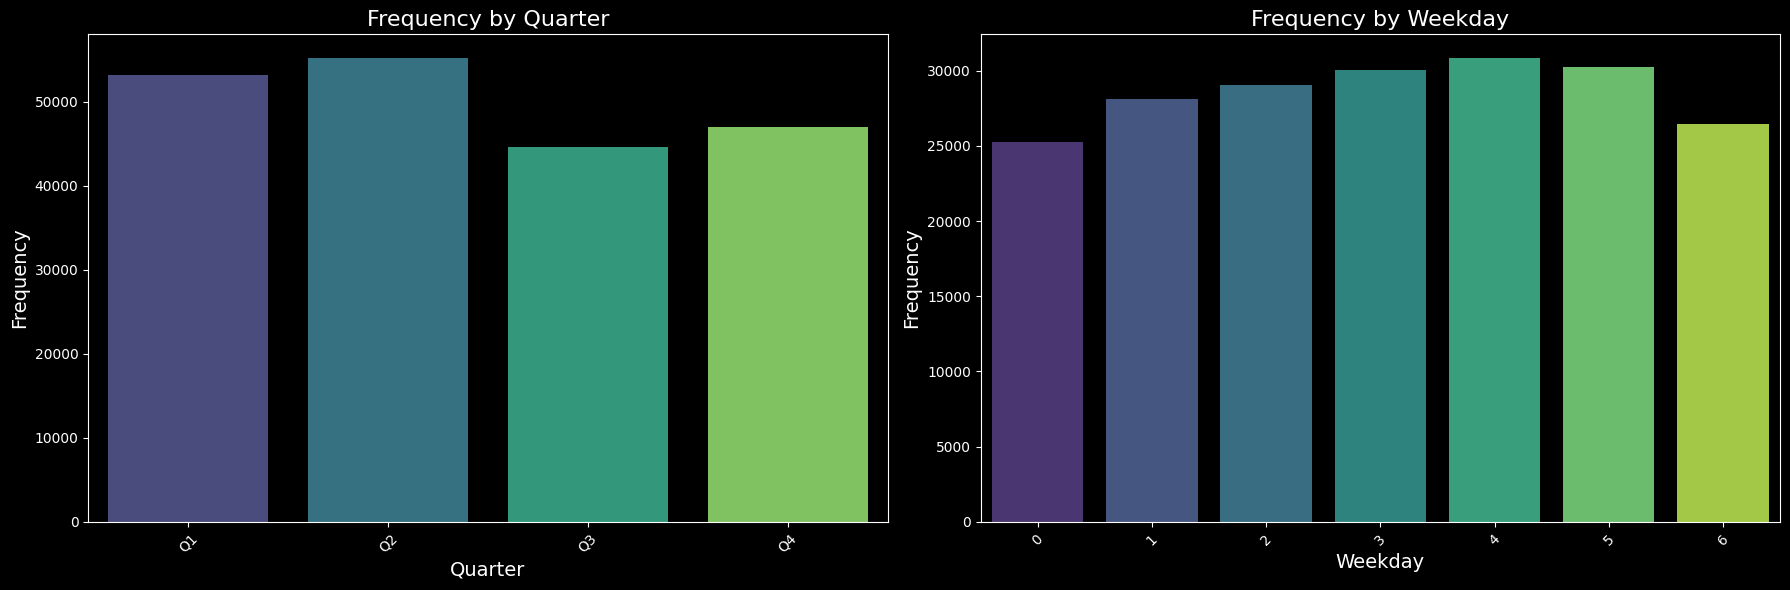

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

quarters_order = sorted(df_time['quarter'].unique())
sns.countplot(ax=axes[0], x='quarter', order = quarters_order, data=df_time, palette="viridis")
axes[0].set_title("Frequency by Quarter", fontsize=16)
axes[0].set_xlabel("Quarter", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

sns.countplot(ax=axes[1], x='weekday', data=df_time, palette="viridis")
axes[1].set_title("Frequency by Weekday", fontsize=16)
axes[1].set_xlabel("Weekday", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Conclusion Of Time Demand Analysis**
- The fare gradually increased from 2009 to 2015.
- Ride frequency shows a notable increase in the first half of the year, as illustrated in the quarterly plot. 
- The frequency of rides declines in the early morning, surges during office hours, and peaks significantly at night.
- There is a substantial increase in ride volume on Fridays and weekends.
